<a href="https://colab.research.google.com/github/gbickenbach/Demand_AdvancedTransit/blob/main/May3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import pandas as pd
import osmnx as ox

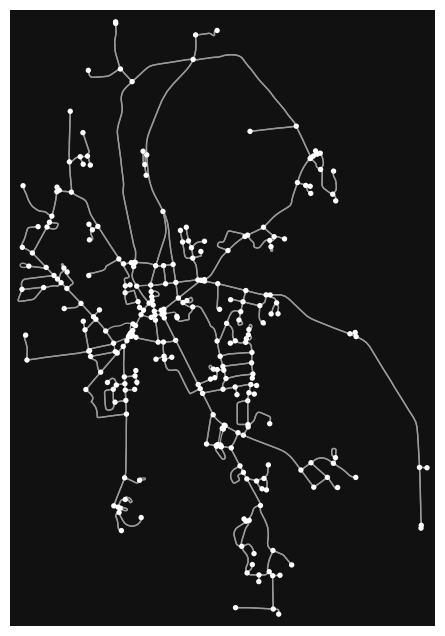

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
from shapely.geometry import Point, Polygon

coordsMiddlebury = [[-73.188508, 44.0397786], [-73.1843814, 43.9971204], [-73.1558923, 43.9832344], [-73.1303148, 43.9973138], [-73.1440477, 44.0419998], [-73.188508, 44.0397786]]
polyMid = Polygon(coordsMiddlebury)

G = ox.graph_from_polygon(polyMid, network_type='drive') # simplify=False
nodes_list = list(G.nodes)
ox.plot_graph(G)

In [ ]:
nodes_list

In [ ]:
#Import Data
data = pd.read_csv('drive/MyDrive/FYREE/Part Four/data.csv')
stations = pd.read_csv('drive/MyDrive/FYREE/Spring/stations.csv')
data = data.drop(columns="Unnamed: 0")

In [ ]:
stations = stations.iloc[:, 0:4]
stations

,Station,Total,Lat
0,Academy Street,NaN,44.010821
8,Eastview,NaN,43.996968
9,Main Street,NaN,44.011659
15,Porter Hospital/Er,NaN,43.999453
21,South Street,NaN,44.007891


In [ ]:
#Import Data
data = pd.read_csv('drive/MyDrive/FYREE/Part Four/data.csv')
stations = pd.read_csv('drive/MyDrive/FYREE/Spring/stations.csv')
data = data.drop(columns="Unnamed: 0")

#Only do this if the objective is to separate by lines
line = input("Enter desired line")
if line == "Blue Line":
  colm = 3
elif line == "Brown Line":
  colm = 4
elif line == "Green Line":
  colm = 5
elif line == "Orange Line":
  colm = 6
elif line == "Purple Line":
  colm = 7
colm += 1
for i, stat in enumerate(stations.iloc[:, colm]):
  if(stat == 0):
    stations = stations.drop(i)
    stations = stations.iloc[:, 0:5]

import matplotlib.pyplot as plt

results = stations
results['Count'] = 0
a = 0
sum = 0
threshold = 300
uns = pd.DataFrame()

for i, row in enumerate(data.iloc[:, 15]):
  print(str(round((i/309), 2)))
  for j, fila in enumerate(stations.iloc[:, 2]):
    orighome = ox.distance.nearest_nodes(G, data.iloc[i, 16], data.iloc[i, 15])
    desthome = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
    routehome = nx.shortest_path_length(G,  source=orighome, target=desthome, weight='length')

    origwork = ox.distance.nearest_nodes(G, data.iloc[i, 14], data.iloc[i, 13])
    destwork = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
    routework = nx.shortest_path_length(G,  source=origwork, target=destwork, weight='length')
    if (j == 0):
      name1 = stations.iloc[0, 0]
      name2 = stations.iloc[0, 0]
      minwork = routework
      minhome = routehome
      ind1 = stations.iloc[j, 4]
      ind2 = stations.iloc[j, 4]
    if(routework < minwork):
      orig_w = origwork
      dest_w = destwork
      minwork = routework
      name1 = stations.iloc[j, 0]
      ind2 = stations.iloc[j, 4]
    if(routehome < minhome):
      orig_h = orighome
      dest_h = desthome
      minhome = routehome
      name2 = stations.iloc[j, 0]
      ind1 = stations.iloc[j, 4]
  if((minwork < threshold)&(minhome<threshold)&(minwork != minhome)&(ind1<ind2)):
    for k, row in enumerate(results.iloc[:, 0]):
      if (row == name1):
        results.iloc[k, 5] = results.iloc[k, 5] + 2
      if (row == name2):
        results.iloc[k, 5] = results.iloc[k, 5] + 2
    sum = sum + ((minhome+minwork)/2)
    a = a + 1
  else:
    uns = pd.concat([uns, data.iloc[i].to_frame().T], ignore_index=True)

print(line + ": " + str(2*a) + " people")
demcov = str(round(((a/309)*100), 2))
print("Percentage of total demand pairs covered by this line: " + demcov + "%")
mwdi = round((sum/a), 2)
mwd = str(mwdi)
print("Mean Walking Distance: " + mwd + " meters")

Enter desired lineBlue Line
0.0
0.0
0.01
0.01
0.01
0.02
0.02
0.02
0.03
0.03
0.03
0.04
0.04
0.04
0.05
0.05
0.05
0.06
0.06
0.06
0.06
0.07
0.07
0.07
0.08
0.08
0.08
0.09
0.09
0.09
0.1
0.1
0.1
0.11
0.11
0.11
0.12
0.12
0.12
0.13
0.13
0.13
0.14
0.14
0.14
0.15
0.15
0.15
0.16
0.16
0.16
0.17
0.17
0.17
0.17
0.18
0.18
0.18
0.19
0.19
0.19
0.2
0.2
0.2
0.21
0.21
0.21
0.22
0.22
0.22
0.23
0.23
0.23
0.24
0.24
0.24
0.25
0.25
0.25
0.26
0.26
0.26
0.27
0.27
0.27
0.28
0.28
0.28
0.28
0.29
0.29
0.29
0.3
0.3
0.3
0.31
0.31
0.31
0.32
0.32
0.32
0.33
0.33
0.33
0.34
0.34
0.34
0.35
0.35
0.35
0.36
0.36
0.36
0.37
0.37
0.37
0.38
0.38
0.38
0.39
0.39
0.39
0.39
0.4
0.4
0.4
0.41
0.41
0.41
0.42
0.42
0.42
0.43
0.43
0.43
0.44
0.44
0.44
0.45
0.45
0.45
0.46
0.46
0.46
0.47
0.47
0.47
0.48
0.48
0.48
0.49
0.49
0.49
0.5
0.5
0.5
0.5
0.51
0.51
0.51
0.52
0.52
0.52
0.53
0.53
0.53
0.54
0.54
0.54
0.55
0.55
0.55
0.56
0.56
0.56
0.57
0.57
0.57
0.58
0.58
0.58
0.59
0.59
0.59
0.6
0.6
0.6
0.61
0.61
0.61
0.61
0.62
0.62
0.62
0.63
0.63
0.63
0.64
0.6

In [ ]:
results


,Station,Total,Lat,Lon,Blue Line,Count
0,Academy Street,NaN,44.010821,-73.171586,1,0
8,Eastview,NaN,43.996968,-73.169980,3,0
9,Main Street,NaN,44.011659,-73.169877,5,0
15,Porter Hospital/Er,NaN,43.999453,-73.167428,2,0
21,South Street,NaN,44.007891,-73.170293,4,0


In [ ]:
stations

,Station,Total,Lat,Lon,Blue Line,Count
0,Academy Street,NaN,44.010821,-73.171586,1,0
8,Eastview,NaN,43.996968,-73.169980,3,0
9,Main Street,NaN,44.011659,-73.169877,5,0
15,Porter Hospital/Er,NaN,43.999453,-73.167428,2,0
21,South Street,NaN,44.007891,-73.170293,4,0


In [ ]:
stations

,Station,Total,Lat,Lon,Blue Line,Brown Line,Green Line,Orange Line,Purple Line,Count
0,Academy Street,NaN,44.010821,-73.171586,1,1,1,1,1,14
8,Eastview,NaN,43.996968,-73.169980,1,0,0,0,0,0
9,Main Street,NaN,44.011659,-73.169877,1,0,0,0,1,4
15,Porter Hospital/Er,NaN,43.999453,-73.167428,1,0,0,0,0,20
21,South Street,NaN,44.007891,-73.170293,1,0,0,0,0,14


In [ ]:
#Get nodes for only a specific route
linodes = [0] * len(nodes_list)
indiii = []
for i, node in enumerate(nodes_list):
  if(linodes[i] == 0):
    for j, station in enumerate(stations.iloc[:, 0]):
      orig = node
      dest = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
      route = nx.shortest_path_length(G,  source=orig, target=dest, weight='length')
      if(route<threshold):
        linodes[i] = 1

for k, node in enumerate(linodes):
  if (linodes[k]==0):
    indiii.append(k)

nodes_list = [nodes_list[o] for o in range(len(nodes_list)) if o not in indiii]


In [ ]:
uns

In [ ]:

nodes = [0] * len(nodes_list)
for i, item in enumerate(nodes_list):
  count = 0
  for j, row in enumerate(uns.iloc[:, 15]):
    orig = item
    desthome = ox.distance.nearest_nodes(G, uns.iloc[j, 14], uns.iloc[j, 13])
    routehome = nx.shortest_path_length(G,  source=orig, target=desthome, weight='length')

    destwork = ox.distance.nearest_nodes(G, uns.iloc[j, 16], uns.iloc[j, 15])
    routework = nx.shortest_path_length(G,  source=orig, target=destwork, weight='length')

    if((routework >= threshold)&(routehome<=threshold)):
      nothing = 0
    else:
      count +=1
  nodes[i] += (count) #or minus
  print((i/len(nodes_list)))


0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.78
0.8
0.82
0.84
0.86
0.88
0.9
0.92
0.94
0.96
0.98


In [ ]:
#Calculate the percentile of every node
nodes_p = [0] * len(nodes_list)
for k, item in enumerate(nodes):
  nodes_p[k] = nodes[k] / max(nodes)

In [ ]:
nodes_p

In [ ]:
opstops = int(input("How many optional stops?"))
test = pd.DataFrame()
test["Node Number"] = nodes_list
test["Rating"] = nodes_p
test = test.sort_values(by="Rating", ascending=False)
test = test.reset_index()
test = test.drop(columns="index")
indii = []

for i, item in enumerate(test.iloc[:-1, 0]):
  print(i)
  for j, other in enumerate(test.iloc[i+1:, 0]):
    orig = item
    dest = other
    route = nx.shortest_path_length(G,  source=orig, target=dest, weight='length')
    if(route < threshold):
      indii.append(i+j+1)

indii = sorted(indii)
indii = set(indii)
ops = test.drop(indii)
ops = ops.iloc[:opstops]

How many optional stops?4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [ ]:
for i, item in enumerate(ops.iloc[:-1, 0]):
  for j, other in enumerate(ops.iloc[i+1:, 0]):
    orig = item
    dest = other
    route = nx.shortest_path_length(G,  source=orig, target=dest, weight='length')
    if(route< threshold):
      print(route)
      print("It is less")


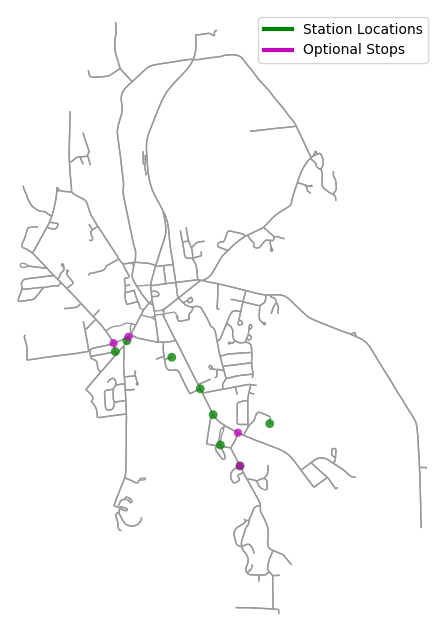

In [ ]:
import matplotlib.pyplot as plt
all_stats = []
new_stats = []


for j, row in enumerate(stations.iloc[:, 0]):

  origi = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  desti = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  rote = nx.shortest_path(G, origi, desti, weight="length")
  all_stats.append(rote)

for j, row in enumerate(ops.iloc[:, 0]):
  origi = row
  desti = row
  rate = nx.shortest_path(G, origi, desti, weight="length")
  new_stats.append(rate)

#bbox = ox.utils_geo.bbox_from_point((44.013924, -73.167247), dist=1000, project_utm=True)
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='w', show=False)

# Plot all_stats in green
for route in all_stats:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='g', orig_dest_size=40, ax=ax)

# Plot new_stats in magenta
for route in new_stats:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='m', orig_dest_size=35, ax=ax)

legend_entries = [
  plt.Line2D([0], [0], color='g', lw=3, label='Station Locations'),
  plt.Line2D([0], [0], color='m', lw=3, label='Optional Stops')
]

# Add legend
ax.legend(handles=legend_entries)

fig